In [174]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist  as fdist
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcolon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from scipy.stats import ttest_ind

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [61]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import missingno

In [24]:
data = pd.read_excel('QVI_transaction_data.xlsx')

In [25]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [26]:
data.shape# 260 thousand rows and 8 columns 

(264836, 8)

In [27]:
data.isnull().any()#checking for null values


DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

# Summary Stats

In [28]:
data.describe()#Summary of the Data 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [29]:
data.info()#Checking the FORMAT OF THE DATA types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [30]:
data.nunique()# lets see how many unique objects we are working with 

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [31]:
#TXN_ID is not Unique to each row whichmeans a customer can buy multiple brands
#of chips in a single transaction and each row of data corresponds to a purchase
# of a single brand of chips and a customer can buy  mulitple brands in  a single transaction

In [32]:
data.loc[data['TXN_ID']==48887]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [33]:
data[data.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [34]:
data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

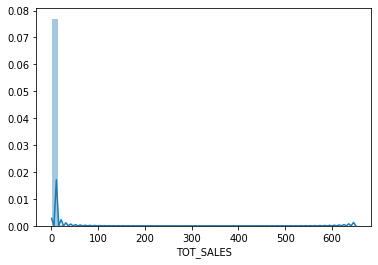

In [35]:
sns.distplot(data.TOT_SALES,kde=True)#Checking for outliers

7.3 is the average amount of sale 

# We are going to fillter out the outliers in Total sales so everything thats < 8.00

In [38]:
numerical_data = pd.read_excel('QVI_transaction_data.xlsx')

In [39]:
x = numerical_data[numerical_data['TOT_SALES'] <8.000]

In [42]:
x.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


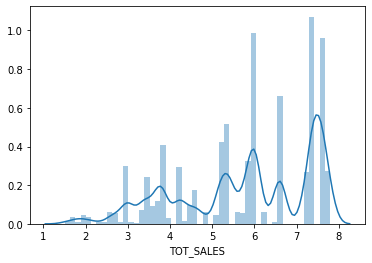

In [41]:
sns.distplot(x.TOT_SALES,kde=True)

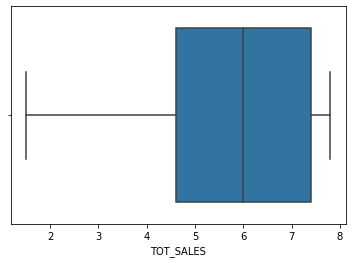

In [31]:
sns.boxplot(x.TOT_SALES)

In [61]:
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

In [62]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


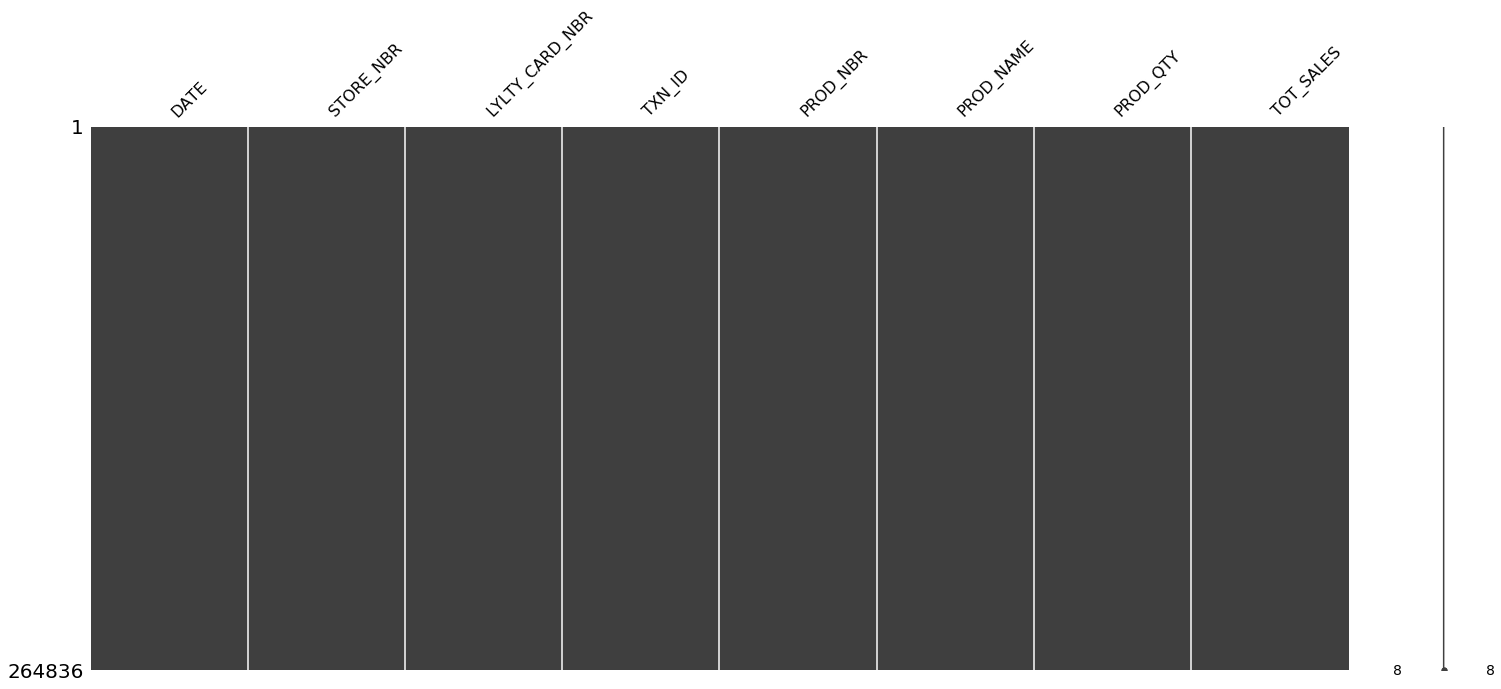

In [63]:
missingno.matrix(data)#plots graph  of missing values for the transaction data 
#no missing values as we can clearly see 

In [65]:
list(data.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [67]:
data['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

In [ ]:
#this function was a bit beyond my understanding but it was useful and i guess thats what stack overflow is for !da

In [69]:
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900,1,1)
    if(xlserialdate <60):
        delta_in_days = datetime.timedelta(days = (xlserialdate-1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate-2))
    converted_date = excel_anchor + delta_in_days
    return converted_date
        

In [70]:
data['DATE'].apply(xlseriesdate_to_datetime)

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [71]:
data['DATE']=data['DATE'].apply(xlseriesdate_to_datetime)

In [88]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [73]:
data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [74]:
#LETS EXTRACT THE WEIGHT FROM THE PRODUCT NAME 

In [89]:
data['PACK_SIZE']=data['PROD_NAME'].str.extract("(\d+)")#grabs any group of digits in the string !

In [90]:
data['PACK_SIZE'].head()# but its still a object so we have to convert it to numberical

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: object

In [91]:
data['PACK_SIZE'] = pd.to_numeric(data['PACK_SIZE'])

In [92]:
data.PACK_SIZE.head()# now the dtype is int64 

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: int64

In [93]:
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [88]:
# we gonna create a function for prod_name feature 

In [94]:
def clean_text(text):
    text= re.sub('[&/]','',text)#removes the special characters & and /
    text= re.sub('\d\w*','',text)#removes product weights 
    return text
data['PROD_NAME']=data['PROD_NAME'].apply(clean_text)

In [95]:
data.PROD_NAME.head()

0     Natural Chip        Compny SeaSalt
1                   CCs Nacho Cheese    
2     Smiths Crinkle Cut  Chips Chicken 
3       Smiths Chip Thinly  SCreamOnion 
4    Kettle Tortilla ChpsHnyJlpno Chili 
Name: PROD_NAME, dtype: object

In [96]:
clean_prod_names = data['PROD_NAME']
string = ''.join(clean_prod_names)#created one Giant string to tokenize the words 

In [97]:
prod_word = word_tokenize(string)

In [98]:
prod_word

['Natural',
 'Chip',
 'Compny',
 'SeaSaltCCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'Smiths',
 'Chip',
 'Thinly',
 'SCreamOnion',
 'Kettle',
 'Tortilla',
 'ChpsHnyJlpno',
 'Chili',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 'Grain',
 'Waves',
 'Sour',
 'CreamChives',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 'Twisties',
 'Cheese',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 'Thins',
 'Chips',
 'Light',
 'Tangy',
 'CCs',
 'Original',
 'Burger',
 'Rings',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Box',
 'Smiths',
 'Crinkle',
 'Original',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Infzns',
 'Crn',
 'Crnchers',
 'Tangy',
 'Gcamole',
 'K

In [99]:
word_freq = fdist(prod_word)
word_freq# counting word frequency 

FreqDist({'Chips': 49770, 'Kettle': 38851, 'Cheese': 27890, 'Smiths': 26969, 'Salt': 24719, 'Crinkle': 23960, 'Pringles': 23552, 'Doritos': 23431, 'Corn': 22063, 'Original': 21560, ...})

In [102]:
freq_df = pd.DataFrame(list(word_freq.items()),columns = ['Word','Frequency']).sort_values(by='Frequency',ascending=False)

In [104]:
freq_df.head(10)

NameError: name 'freq_df' is not defined

In [100]:
data['PROD_NAME']= data['PROD_NAME'].apply(lambda x:x.lower())#Convert all to lower case then we gonna convert it to titles 

In [101]:
data['PROD_NAME'].head()

0     natural chip        compny seasalt
1                   ccs nacho cheese    
2     smiths crinkle cut  chips chicken 
3       smiths chip thinly  screamonion 
4    kettle tortilla chpshnyjlpno chili 
Name: PROD_NAME, dtype: object

In [102]:
data = data[~data['PROD_NAME'].str.contains('salsa')]


In [103]:
data['PROD_NAME'].head()

0     natural chip        compny seasalt
1                   ccs nacho cheese    
2     smiths crinkle cut  chips chicken 
3       smiths chip thinly  screamonion 
4    kettle tortilla chpshnyjlpno chili 
Name: PROD_NAME, dtype: object

In [105]:
data['PROD_NAME']=data['PROD_NAME'].apply(lambda x:x.title())# after we converted to lower case we made all the chips names into titles

In [111]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150


#lets move on to the next feature to explore

In [107]:
data['PROD_QTY'].value_counts()#200 seems strange lets look closer into that 

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [113]:
data.loc[data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [114]:
# lets dive further into this customer 

In [108]:
data.loc[data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,Doritos,380
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,Doritos,380


In [109]:
#he only made two transactions so we know he is not retail but purchasing for commercial purposes so we can drop him 

In [110]:
data.drop(data.index[data['LYLTY_CARD_NBR']==226000], inplace = True)#dropping this customer , we dont want outliers 

In [111]:
customer_data.drop(customer_data.index[customer_data['LYLTY_CARD_NBR']==226000],inplace = True)

In [112]:
data.loc[data['LYLTY_CARD_NBR']==226000]# ROW HAS BEEN DROPPED 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE


In [113]:
data['DATE'].nunique()# HMMM theres 365 days in the year so what day is missing lets look further into this 

364

In [114]:
pd.date_range(start ='2018-07-01',end = '2019-06-30').difference(data['DATE'])#of course Christmas day is closed 

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq=None)

In [116]:
data['DATE'].max()#thats how we get values to use to find difference 

43646

In [117]:
data['DATE'].min()

43282

In [118]:
#CREATING NEW DATA FRAME that AGGREGATES TOTAL sales 

In [119]:
a = pd.pivot_table(data,values='TOT_SALES',index='DATE',aggfunc ='sum')

In [120]:
a.head()

,TOT_SALES
DATE,
43282,4920.1
43283,4877.0
43284,4954.7
43285,4968.1
43286,4682.0


In [121]:
data.PACK_SIZE.head()

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: int64

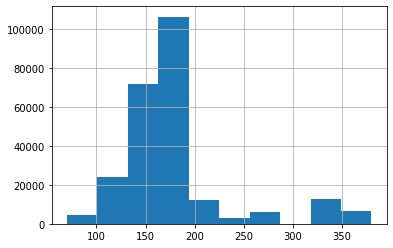

In [122]:
data.PACK_SIZE.hist()

In [123]:
data.PACK_SIZE.unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

In [124]:
#70 smallest pack size and 380 is the largest 

In [125]:
part = data.PROD_NAME.str.partition()
data['BRAND']= part[0]
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,Natural,175
1,43599,1,1307,348,66,Ccs Nacho Cheese,3,6.3,Ccs,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smiths,170
3,43329,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,Smiths,175
4,43330,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,Kettle,150


In [126]:
data.BRAND.unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [127]:
data.BRAND.replace('Ncc','Natural',inplace = True)
data.BRAND.replace('Ccs','CCS',inplace = True)
data.BRAND.replace('smith','Smiths',inplace = True)
data.BRAND.replace(['Grain','GrnWves'],'Grainwaves',inplace = True)
data.BRAND.replace('Dorito','Doritos',inplace = True)
data.BRAND.replace('Ww','Woolworths',inplace = True)
data.BRAND.replace('Infzns','Infuzions',inplace = True)
data.BRAND.replace(['Red','Rrd','RRD'],'Red Rock Deli',inplace = True)
data.BRAND.replace('Snbts','Sunbites',inplace = True)
data.BRAND.unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Cheetos', 'Sunbites'],
      dtype=object)

In [128]:
data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending=False)

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           202908.6
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        43048.8
Natural           42318.0
Woolworths        41059.1
Cheezels          40029.9
CCS               18078.9
Cheetos           16884.5
Smith             14583.4
Sunbites           9676.4
Grnwves            8568.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

In [129]:
b = data.groupby('BRAND').TOT_SALES.sum()

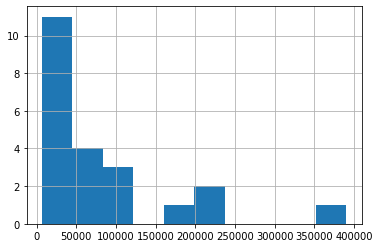

In [130]:
b.hist()

In [131]:
list(customer_data.columns)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [132]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [133]:
customer_data.isnull().any()#no null values

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [134]:
len(customer_data)

72636

In [135]:
customer_data.LYLTY_CARD_NBR.nunique()#Everything is Unique

72636

In [136]:
customer_data.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [138]:
customer_data.LIFESTAGE.value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

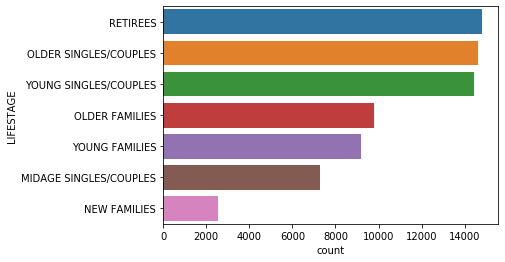

In [139]:
sns.countplot(y = customer_data.LIFESTAGE,order = customer_data.LIFESTAGE.value_counts().index)

In [140]:
customer_data.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [141]:
customer_data.PREMIUM_CUSTOMER.value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

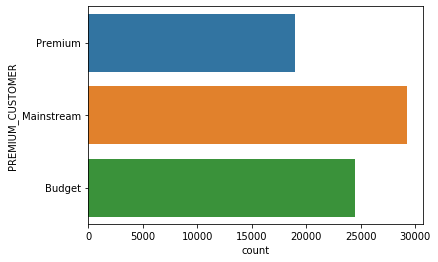

In [142]:
sns.countplot(y=customer_data.PREMIUM_CUSTOMER)

In [143]:
data.shape

(246740, 10)

In [144]:
customer_data.shape

(72636, 3)

In [145]:
mergedata = pd.merge(data,customer_data)

In [146]:
mergedata.shape

(246740, 12)

In [147]:
mergedata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,Ccs Nacho Cheese,3,6.3,CCS,175,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,Ww Original Stacked Chips,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,Ccs Original,1,2.1,CCS,175,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [155]:
mergedata.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [148]:
mergedata.shape

(246740, 12)

In [149]:
mergedata.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND               0
PACK_SIZE           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [152]:
sales = pd.DataFrame(mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())
sales.sort_values(by = 'TOT_SALES',ascending = False,inplace= True)

In [153]:
sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

In [157]:
salesplot = pd.DataFrame(mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())

In [158]:
salesplot

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

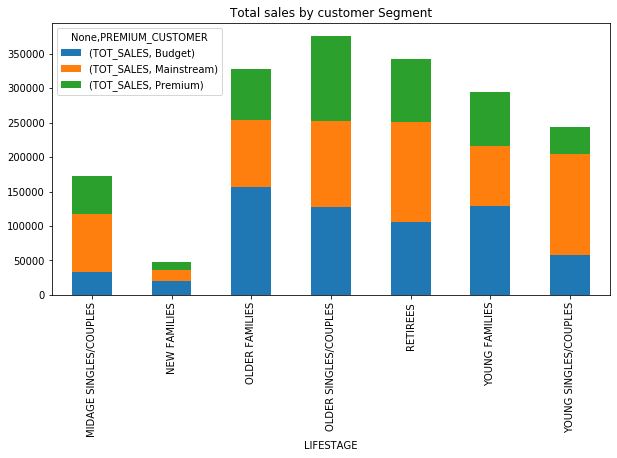

In [159]:
salesplot.unstack().plot(kind='bar',stacked=True,figsize=(10,5),title='Total sales by customer Segment')

In [162]:
customers = pd.DataFrame(mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.sort_values(by='LYLTY_CARD_NBR',ascending=False).head(10)

LYLTY_CARD_NBR
PREMIUM_CUSTOMER LIFESTAGE                            
Mainstream       YOUNG SINGLES/COUPLES            7917
                 RETIREES                         6358
                 OLDER SINGLES/COUPLES            4858
Budget           OLDER SINGLES/COUPLES            4849
Premium          OLDER SINGLES/COUPLES            4682
Budget           OLDER FAMILIES                   4611
                 RETIREES                         4385
                 YOUNG FAMILIES                   3953
Premium          RETIREES                         3812
Budget           YOUNG SINGLES/COUPLES            3647

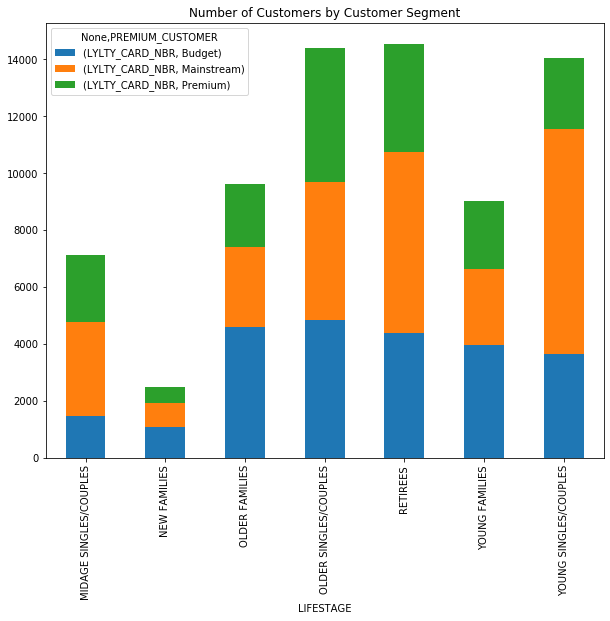

In [164]:
customersplot=pd.DataFrame(mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersplot.unstack().plot(kind='bar',stacked=True,figsize=(10,8),title='Number of Customers by Customer Segment')

In [182]:
#avg units per customer by Premium and LifeStage
avg_units = mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).PROD_QTY.sum()/mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units,columns ={'Average Unit per Customer'})
avg_units.sort_values(by='Average Unit per Customer',ascending =False).head(9)

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013
Mainstream,YOUNG FAMILIES,8.638361
Budget,OLDER SINGLES/COUPLES,6.781398
Premium,OLDER SINGLES/COUPLES,6.769543
Mainstream,OLDER SINGLES/COUPLES,6.712021


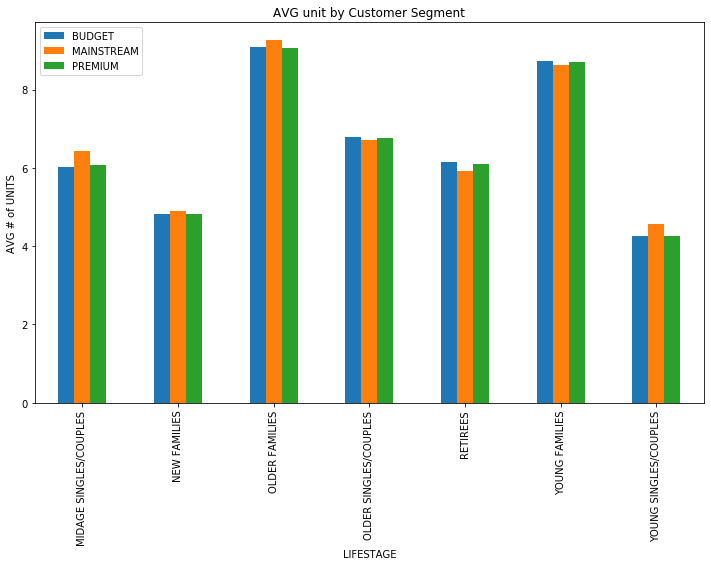

In [184]:
avg_unit_plot = pd.DataFrame(mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()/
                        mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avg_unit_plot.unstack().plot(kind = 'bar',figsize = (12,7),title='AVG unit by Customer Segment')
plt.ylabel('AVG # of UNITS')
plt.legend(['BUDGET','MAINSTREAM','PREMIUM'],loc = 2)

In [187]:
#Avg Price per Unit by Premium customer and Lifestage
avg_price = mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum()/mergedata.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price,columns={'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head(8)

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969
Premium          RETIREES                      3.924037
                 OLDER SINGLES/COUPLES         3.897698
Budget           OLDER SINGLES/COUPLES         3.887529

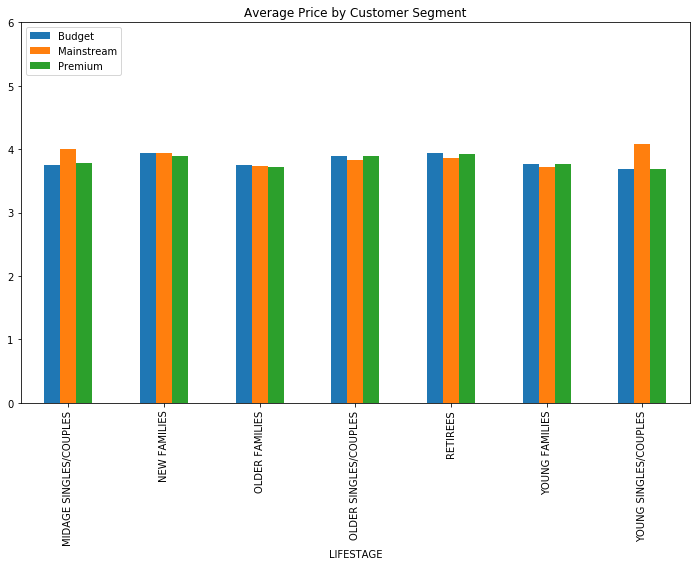

In [188]:
avg_price_plot = pd.DataFrame(mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum() / mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())
avg_price_plot.unstack().plot(kind ='bar',figsize = (12 ,7 ),
                             title = 'Average Price by Customer Segment',
                             ylim = (0,6))
plt.ylabel = ('Average Price')
plt.legend(['Budget','Mainstream','Premium'],loc = 2)

In [190]:
#mainstream midage and young singles and couples are more willing to pay per packet of chips compared o their budget and premium counter parts 

# PERFORMING A INDEPENDENT T TEST BETWEEN MAIN STREAM AND 
# NON MAINSTREAM  mid age and young singles/couples to test this difference 


In [203]:
#create a new datafram pricerperUnit 
price_per_unit = mergedata

#create a new column under priceperunit  called price 
price_per_unit['PRICE'] = price_per_unit['TOT_SALES']/price_per_unit['PROD_QTY']
price_per_unit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,43390,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,43599,1,1307,348,66,Ccs Nacho Cheese,3,6.3,CCS,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,43414,1,1307,346,96,Ww Original Stacked Chips,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget,1.90
3,43533,1,1307,347,54,Ccs Original,1,2.1,CCS,175,MIDAGE SINGLES/COUPLES,Budget,2.10
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,1.45


In [205]:
#Grouping Data into Mainstream and non -mainstream 
mainstream = price_per_unit.loc[(price_per_unit['PREMIUM_CUSTOMER']==
                'Mainstream') & ((price_per_unit['LIFESTAGE']==
                'YOUNG SINGLES/COUPLES')| (price_per_unit
                ['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')),'PRICE']
non_main_stream = price_per_unit.loc[(price_per_unit['PREMIUM_CUSTOMER']
    != 'Mainstream') & ((price_per_unit['LIFESTAGE']==
    'YOUNG SINGLES/COUPLES')|(price_per_unit['LIFESTAGE']
    =='MIDAGE SINGLES/COUPLES')),'PRICE']

Text(0.5, 0, 'Price per unit ')

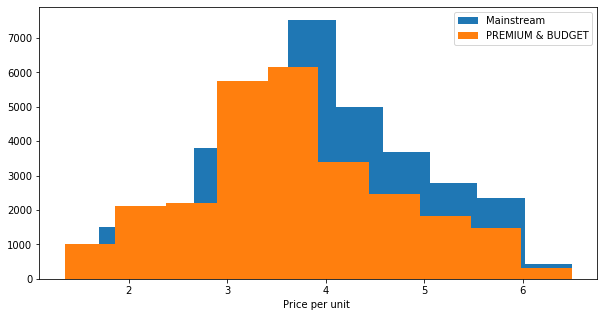

In [206]:
#histogram on mainstream and non mainstream
plt.figure(figsize=(10,5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(non_main_stream,label = 'PREMIUM & BUDGET')
plt.legend()
plt.xlabel('Price per unit ')

In [209]:
print('Mainstream average price per unit:',np.mean(mainstream))
print('Non-mainstram average price per unit ',np.mean(non_main_stream))

Mainstream average price per unit: 4.039785893795137
Non-mainstram average price per unit  3.706491319963857


In [211]:
# perform two sided  T -test
ttest_ind(mainstream,non_main_stream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [ ]:
# REJECT THE NULLL HYPOTHESIS the mainstream and non mainstream groups do no have the same mean 

In [ ]:
#main stream customers have higher average price per unit than that of non main stream customers
#We could target customer segments that have the most sales to increase or maintain retention


# SUMMARY REPORT 

In [ ]:
# sales are highest for (budget, older families),(mainstream, young singles/couples) and (maintstream,retirees)
# Mainstream young singles and Retirees have the most customers in that segment
# Main stream young singles are more likely to purchase Tyrells 270 pack also
#older families and youg families buy more chips per customer
